In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
import sympy as sym

In [2]:
x = Symbol('x')
y = Symbol('y')
k1 = Symbol('k1')
k1_inv = Symbol('k1_inv')
k2 = Symbol('k2')
k2_inv = Symbol('k2_inv')
k3 = Symbol('k3')
alpha = Symbol('alpha')

f1 = k1 * (1 - x- y) - k1_inv * x - k3 * (1 - x) ** alpha * x * y
f2 = k2 * (1 - x - y) ** 2 - k2_inv * y **2 - k3 * (1 - x) ** alpha * x * y
sol = solve((f1, f2), (k2, y))
k_expr = sol[0][0]
y_expr = sol[0][1]

In [3]:
a11 = sym.diff(f1, x)
a12 = sym.diff(f1, y)
a21 = sym.diff(f2, x)
a22 = sym.diff(f2, y)

In [4]:
alpha_val = 18
k1_val = 0.012
k1_inv_val = 0.01
k2_inv_val = 10e-9
k3_val = 10

In [5]:
x_val = np.linspace(0.1, 0.9, 1000)
y_val = np.zeros(len(x_val))
k2_val = np.zeros(len(x_val))
k2_val_tmp = np.zeros(len(x_val))
trace = np.zeros(len(x_val))
det = np.zeros(len(x_val))
a11_values = np.zeros(len(x_val))
a22_values = np.zeros(len(x_val))
di = np.zeros(len(x_val))
x_sn, y_sn, k2_sn = [], [], []
x_s1, y_s1, k2_s1 = [], [], []
x_s2, y_s2, k2_s2 = [], [], []
for i in range(len(x_val)):
    y_val[i] = float(y_expr.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])})) 
    if y_val[i] < 0:
        break
    # y_val[i] = (k1_val * (1 - x_val[i]) - k1_inv_val * x_val[i]) / (k1_val + k3_val * (1 - x_val[i]) ** alpha_val * x_val[i])
    # k2_val[i] = float(k_expr.subs({k1: k1_val, k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    k2_val[i] = (k2_inv_val * y_val[i] **2 + k3_val * (1 - x_val[i])**alpha_val * x_val[i] * y_val[i]) / (1 - x_val[i] - y_val[i]) ** 2
    
    a11_val = float(a11.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a22_val = float(a22.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a12_val = float(a12.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a21_val = float(a21.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a11_values[i] = a11_val
    a22_values[i] = a22_val
    trace[i] = a11_val + a22_val
    det[i] = a11_val * a22_val - a12_val * a21_val
    di[i] = trace[i] ** 2 - 4 * det[i]
    if i != 0:
        if trace[i] * trace[i - 1] <= 0:
            x_sn.append(x_val[i])
            y_sn.append(y_val[i])
            k2_sn.append(k2_val[i])
        if a11_values[i] * a11_values[i - 1] <= 0:
            x_s1.append(x_val[i])
            y_s1.append(y_val[i])
            k2_s1.append(k2_val[i])
        if a22_values[i] * a22_values[i - 1] <= 0:
            x_s2.append(x_val[i])
            y_s2.append(y_val[i])
            k2_s2.append(k2_val[i])


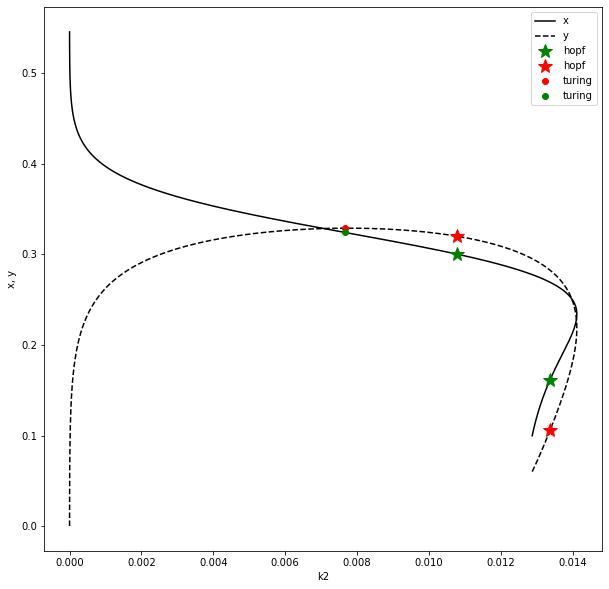

In [6]:
fig = plt.figure(figsize=(10, 10))
mask = k2_val != 0
plt.plot(k2_val[mask], x_val[mask], color='black', label='x')
plt.plot(k2_val[mask], y_val[mask], color='black', linestyle='--', label='y')
plt.plot(k2_sn,  x_sn, '*', markersize=15, color='green', label='hopf')
plt.plot(k2_sn,  y_sn, '*', markersize=15, color='red', label='hopf')

plt.plot(k2_s1, y_s1, 'go', color='red', label='turing')
plt.plot(k2_s1, x_s1, 'go', color='green', label='turing')

# plt.plot(k2_s2, y_s2, 's', color='red', label='saddle-node')
# plt.plot(k2_s2, x_s2, 's', color='green', label='saddle-node')


plt.xlabel('k2')
plt.ylabel('x, y')
plt.legend()
plt.savefig('tmp.png')
#plt.plot([0, 0], [1, 0])
#plt.xlim(left=4.0)
# plt.ylim(0, 1)
# plt.xlim(left=0.001)

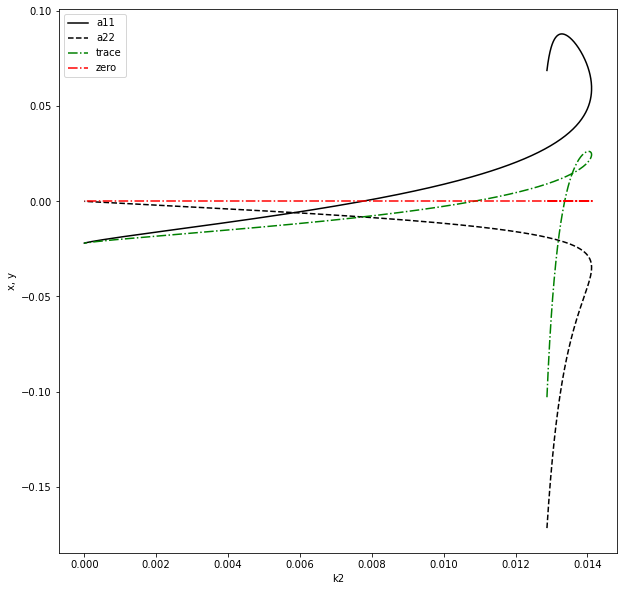

In [7]:

fig = plt.figure(figsize=(10, 10))
plt.plot(k2_val[mask], a11_values[mask], color='black', label='a11')
plt.plot(k2_val[mask], a22_values[mask], color='black', linestyle='--', label='a22')
plt.plot(k2_val[mask], trace[mask], color='green', linestyle='-.', label='trace')
plt.plot(k2_val[mask], np.zeros(len(k2_val[mask])), color='red', linestyle='-.', label='zero')
plt.xlabel('k2')
plt.ylabel('x, y')
plt.legend()

In [8]:
D1 = 0.001
D2 = 1.0
DD = 2 * D1 * D2
k2s = 0.008
L = 50

In [9]:
x_val = np.linspace(0.1, 0.9, 100)
y_val = np.zeros(len(x_val))
k2_val = np.zeros(len(x_val))
k2_val_tmp = np.zeros(len(x_val))
trace = np.zeros(len(x_val))
det = np.zeros(len(x_val))
b_values = np.zeros(len(x_val))
disc = np.zeros(len(x_val))
dks = np.zeros(len(x_val))
di = np.zeros(len(x_val))
h1 = np.zeros(len(x_val))
h2 = np.zeros(len(x_val))
mn1 = np.zeros(len(x_val))
mn2 = np.zeros(len(x_val))
k1s, ys, xs = [], [], []
a11s, a22s, sps, dels = [], [], [], []
count = -1
for i in range(len(x_val)):
    y_val[i] = float(y_expr.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i])})) 
    if y_val[i] < 0:
        break
    # y_val[i] = (k1_val * (1 - x_val[i]) - k1_inv_val * x_val[i]) / (k1_val + k3_val * (1 - x_val[i]) ** alpha_val * x_val[i])
    # k2_val[i] = float(k_expr.subs({k1: k1_val, k1_inv: k1_inv_val, k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    k2_val[i] = (k2_inv_val * y_val[i] **2 + k3_val * (1 - x_val[i])**alpha_val * x_val[i] * y_val[i]) / (1 - x_val[i] - y_val[i]) ** 2
    
    a11_val = float(a11.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a22_val = float(a22.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a12_val = float(a12.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    a21_val = float(a21.subs({k1: k1_val, k1_inv: k1_inv_val, k2: k2_val[i], k2_inv: k2_inv_val, k3: k3_val, alpha: alpha_val, x: float(x_val[i]), y: float(y_val[i])}))
    trace[i] = a11_val + a22_val
    det[i] = a11_val * a22_val - a12_val * a21_val
    b_values[i] = D1 * a22_val + D2 * a11_val
    disc[i] = b_values[i] ** 2 - 4 * D1 * D2 * det[i]
    dks[i] = k2_val[i] - k2s
    di[i] = trace[i] ** 2 - 4 * det[i]

    
    if disc[i] >= 0:
        count += 1
        
        h1[count] = (b_values[i] + np.sqrt(disc[i])) / DD
        h2[count] = (b_values[i] - np.sqrt(disc[i])) / DD
        mn1[count] = np.sqrt(h1[count]) * L / np.pi
        mn2[count] = np.sqrt(h2[count]) * L / np.pi
        k2_val[count] = k2_val[i]


    if i > 0:
        if dks[i] * dks[i - 1] <= 0:
            k1s.append(k1_val)
            ys.append(y_val[i])
            xs.append(x_val[i])
            a11s.append(a11_val)
            a22s.append(a22_val)
            sps.append(trace[i])
            dels.append(det[i])


<ipython-input-9-2b6373e8b0fd>:44: RuntimeWarning: invalid value encountered in sqrt
  mn2[count] = np.sqrt(h2[count]) * L / np.pi
<ipython-input-9-2b6373e8b0fd>:43: RuntimeWarning: invalid value encountered in sqrt
  mn1[count] = np.sqrt(h1[count]) * L / np.pi


In [18]:
a11s

[-0.001246210470354031]

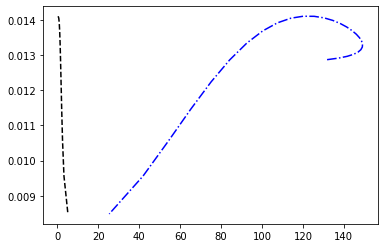

In [10]:
plt.plot(mn1[:count], k2_val[:count], color='blue', linestyle='-.')
plt.plot(mn2[:count], k2_val[:count], color='black', linestyle='--')

In [11]:
A11 = a11s[0]
A22 = a22s[0]
S_A = sps[0]
delta_A = dels[0]

h = np.linspace(0, L, 100)
S_B = np.zeros(len(h))
delta_B = np.zeros(len(h))
gam1 = np.zeros(len(h))
gam2 = np.zeros(len(h))
nn = np.zeros(len(h))
for i in range(len(h)):
    nn[i] = np.sqrt(h[i]) * L / np.pi
    S_B[i] = S_A - h[i] * (D1 + D2)
    delta_B[i] = delta_A - (A11 * D2 + A22 * D1) * h[i] + D1 * D2 * h[i] ** 2
    gam1[i] = 0.5 * (S_B[i] + np.sqrt(S_B[i] ** 2 - 4 * delta_B[i]))  
    gam2[i] = 0.5 * (S_B[i] - np.sqrt(S_B[i] ** 2 - 4 * delta_B[i]))  

Dis = (A11 * D2 + A22 * D1) ** 2 - 4 * delta_A *D1 * D2
h1 = (A11 * D2  + A22 * D1  + np.sqrt(Dis))/DD
h2 = (A11 * D2  + A22 * D1  - np.sqrt(Dis))/DD
nh1 = np.sqrt(h1) * L / np.pi
nh2 = np.sqrt(h2) * L / np.pi

<ipython-input-11-6766c3f6d528>:16: RuntimeWarning: invalid value encountered in sqrt
  gam1[i] = 0.5 * (S_B[i] + np.sqrt(S_B[i] ** 2 - 4 * delta_B[i]))
<ipython-input-11-6766c3f6d528>:17: RuntimeWarning: invalid value encountered in sqrt
  gam2[i] = 0.5 * (S_B[i] - np.sqrt(S_B[i] ** 2 - 4 * delta_B[i]))
<ipython-input-11-6766c3f6d528>:22: RuntimeWarning: invalid value encountered in sqrt
  nh1 = np.sqrt(h1) * L / np.pi
<ipython-input-11-6766c3f6d528>:23: RuntimeWarning: invalid value encountered in sqrt
  nh2 = np.sqrt(h2) * L / np.pi


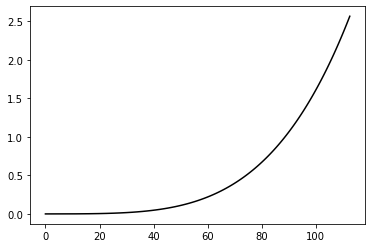

In [12]:
plt.plot(nn, delta_B, color='black', linestyle='-')
plt.plot(nh1, 0, 'go')
plt.plot(nh2, 0, 'go')

In [21]:
xs[0]

0.32626262626262625

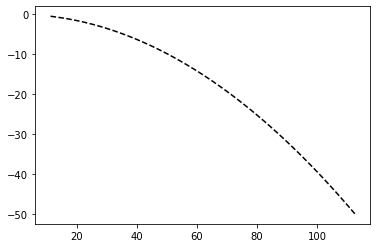

In [14]:
plt.plot(nn, gam2, color='black', linestyle='--')

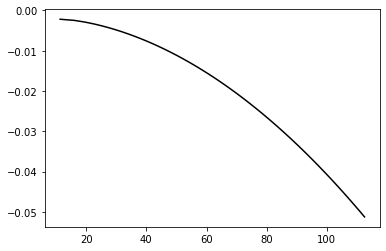

In [15]:
plt.plot(nn, gam1, color='black')

1.5724319693315204e-06